# Regresion lineal con tensorflow

In [17]:
import pandas as pd

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches



route_cvv=r"C:\Users\Cristian\PythonLogic\Ciencia de datos y Aprendizaje Automatico\Media\FuelConsumption.csv"

dataset=pd.read_csv(route_cvv)


Desarollaremos una regresion lineal con tensorflow para predecir las emisiones de co2(Co2Emission) segun su tamaño de motor

In [18]:
x_train=np.asanyarray(dataset[["ENGINESIZE"]])

y_train=np.asanyarray(dataset[["CO2EMISSIONS"]])

#Creamos datos de entrenamiento para trabajar con la regresion

La función $np.asanyarray()$ en NumPy se utiliza para convertir una entrada en un arreglo NumPy si es posible, o en su defecto, en un arreglo de tipo ndarray.

La principal diferencia entre $np.asanyarray()$ y $np.asarray()$ es que np.$asanyarray()$ no realiza una copia de los datos si la entrada ya es un arreglo NumPy, mientras que np.asarray() siempre crea una nueva copia de los datos.

La función $np.asanyarray()$ es útil cuando se desea trabajar con arreglos NumPy, pero se quiere evitar la creación innecesaria de copias de datos. Por ejemplo, si se tiene una función que acepta un arreglo NumPy como argumento, pero también puede aceptar otros tipos de datos, se puede utilizar 
$np.asanyarray()$ para asegurarse de que se está trabajando con un arreglo NumPy sin realizar copias innecesarias.

In [19]:
a:float = tf.Variable(28.2) 

b:float = tf.Variable(15.2)

#Creamos 2 tensores con valores cualquiera para poder crear la regresion

La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable independiente (en este caso x) y una variable dependiente (en este caso y). En su forma más simple, se puede expresar como:

$$y=mx + b$$


Donde:


- y es la variable dependiente (el valor que queremos predecir).$

- x es la variable independiente (la entrada).$

- m es la pendiente de la línea (representada por la variable a en tu código). $

- b es la intersección con el eje $

- y (representada por la variable b en tu código)

Nota : Esta es otra formula de representacion de la regresion , no quiere decir que es la unica, tambien existe el otro tipo usando en scikit learn

In [20]:
def lineal_Regression_operation(x:float) -> float:

    y=a*x+b

    return y


In [21]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    

La función loss_object es una función que calcula la función de pérdida entre las predicciones del modelo (y) y las etiquetas verdaderas del conjunto de datos de entrenamiento (train_y). 

Esta función de pérdida particular utiliza el error cuadrático medio (MSE, por sus siglas en inglés) como métrica de pérdida.

- tf.square(y - train_y): Calcula el cuadrado de la diferencia entre las predicciones del modelo y y las etiquetas verdaderas train_y. Esta operación eleva al cuadrado cada elemento de la diferencia.

- tf.reduce_mean(...): Calcula la media (promedio) de los valores resultantes de tf.square(y - train_y). tf.reduce_mean es una función de reducción de TensorFlow que reduce el tensor a lo largo de una dimensión especificada (o todas las dimensiones si no se proporciona una).

# Gradiente

En el contexto del cálculo y del aprendizaje automático, un gradiente es una medida de la tasa de cambio de una función con respecto a sus variables. Más específicamente, el gradiente indica la dirección y la magnitud del cambio máximo en la función en un punto dado.

En el caso del aprendizaje automático, el gradiente se utiliza comúnmente en algoritmos de optimización para ajustar los parámetros de un modelo. Por ejemplo, en el aprendizaje supervisado, donde tenemos un conjunto de datos de entrada y sus correspondientes etiquetas de salida, utilizamos el gradiente para ajustar los pesos del modelo con el fin de minimizar alguna función de pérdida que mide la discrepancia entre las predicciones del modelo y las etiquetas verdaderas.

El gradiente se calcula mediante el cálculo de las derivadas parciales de la función de pérdida con respecto a los parámetros del modelo. Esto proporciona la dirección en la que se deben ajustar los parámetros para minimizar la función de pérdid


tf.GradientTape() es una herramienta en TensorFlow que se utiliza para el cálculo automático de gradientes. Permite calcular automáticamente gradientes de operaciones que se realizan dentro del contexto del objeto tf.GradientTape(). Esto es especialmente útil en el contexto del aprendizaje automático y la optimización, donde a menudo necesitamos calcular gradientes para ajustar los parámetros de un modelo durante el entrenamiento.

Cuando se utiliza tf.GradientTape(), TensorFlow registra todas las operaciones realizadas dentro de su contexto para calcular el gradiente de cualquier tensor con respecto a las variables que se están rastreando. 

In [22]:
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
training_epochs = 200

El valor del learning rate (tasa de aprendizaje) es un hiperparámetro crucial en el entrenamiento de modelos de aprendizaje automático

El learning rate controla la magnitud de los ajustes que se realizan a los parámetros del modelo durante el entrenamiento. Es esencialmente un factor de escala que multiplica los gradientes antes de restarse de los parámetros actuales del modelo. Un learning rate más alto conduce a cambios más grandes en los parámetros, mientras que un learning rate más bajo produce cambios más pequeños.

La elección del learning rate es crítica. Si es demasiado bajo, el modelo puede tardar mucho tiempo en converger y el entrenamiento puede ser demasiado lento. Si es demasiado alto, el modelo puede oscilar o divergir, lo que significa que la pérdida puede aumentar en lugar de disminuir.

El valor específico de 0.01 es una elección común para empezar. A menudo, se elige en función de la experiencia previa con problemas similares, de la literatura sobre el tema o mediante pruebas y ajustes experimentales.

Learning rate alto (0.1 ---> 1.0) Modelos grandes con datos grandes

Learning rate mediano (0.1 ---> 1.0) Para experimentar

Learning rate bajos (0.001  --> 0.01) Modelos complejos y pocos datos




La variable $training_epochs$ en este contexto representa el número de épocas o iteraciones completas a través del conjunto de datos de entrenamiento durante el proceso de entrenamiento de un modelo de aprendizaje automático.

In [23]:
# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = lineal_Regression_operation(x_train)
        loss_value = loss_object(y_train,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

Este algoritmo es para entrenar un modelo de **Regresión Lineal**. Aquí está lo que hace cada parte:

1. **Inicialización**: 
    - Antes de entrar en el bucle de entrenamiento, se inicializan los parámetros del modelo, `a` y `b`.
    - Se definen las listas `a_values`, `b_values`, `loss_values` y `train_data` para almacenar los valores de los parámetros, las pérdidas y los datos de entrenamiento a lo largo del tiempo.

2. **Bucle de entrenamiento**: 
    - El algoritmo itera sobre un número predefinido de épocas de entrenamiento. En cada época:
        - Se calcula la predicción del modelo (`y_predicted`) para los datos de entrenamiento (`x_train`) utilizando la operación de regresión lineal (`lineal_Regression_operation`).
        - Se calcula la pérdida entre la predicción del modelo y los verdaderos valores objetivo (`y_train`) utilizando el objeto de pérdida (`loss_object`). Esta pérdida se añade a la lista `loss_values`.
        - Se calculan los gradientes de la pérdida con respecto a los parámetros del modelo (`a` y `b`) utilizando `tf.GradientTape()`.
        - Se actualizan los parámetros del modelo restando el producto de los gradientes y la tasa de aprendizaje (`learning_rate`) a los valores actuales de los parámetros. Esto se hace utilizando el método `assign_sub()`.
        - Se añaden los valores actuales de los parámetros a las listas `a_values` y `b_values`.
        - Si la época actual es un múltiplo de 5, se añade una lista con los valores actuales de los parámetros a la lista `train_data`.
        

3. **tape**: Es una instancia de `tf.GradientTape()`. TensorFlow proporciona la clase tf.GradientTape para la diferenciación automática, es decir, calcular el gradiente de una computación con respecto a algunas entradas, normalmente `tf.Variables`. TensorFlow “registra” las operaciones relevantes ejecutadas dentro del contexto de un tf.GradientTape en una “cinta”. TensorFlow luego usa esa cinta para calcular los gradientes de una computación registrada usando la diferenciación en modo inverso.
   
- `gradient()`: Es un método de la clase tf.GradientTape(). Calcula los gradientes de una función objetivo con respecto a las variables dadas. En este caso, la función objetivo es loss_value y las variables son [b,a].

- loss_value: Es el valor de la función de pérdida calculada en el paso anterior. Esta función de pérdida mide cuán bien el modelo está haciendo en las predicciones. El objetivo del entrenamiento es minimizar esta pérdida.

- [b,a]: Son los parámetros del modelo, es decir, las variables con respecto a las cuales se calculan los gradientes. En el contexto de la regresión lineal, b es el término de sesgo y a es el coeficiente de la variable independiente.
  
El resultado, gradients, es una lista de tensores del mismo tamaño y forma que [b,a], donde cada tensor es el gradiente de loss_value con respecto a la correspondiente variable en [b,a].


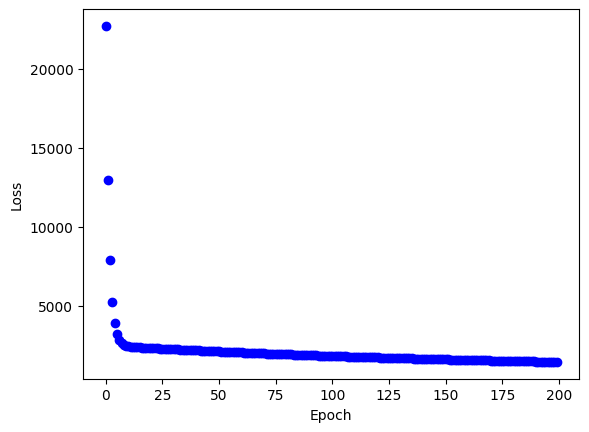

In [24]:
plt.xlabel("Epoch")

plt.ylabel("Loss")

plt.plot(loss_values,'o',c="blue")



plt.show()

La gráfica generada por el código muestra cómo cambia el valor de la pérdida (Loss) a medida que aumentan las épocas de entrenamiento (Epoch). Aquí está lo que podemos analizar:

-Disminución de la pérdida: La línea azul oscuro en la gráfica muestra una tendencia descendente, lo que indica que la pérdida disminuye a medida que aumentan las épocas. Esto es una buena señal ya que significa que el modelo está aprendiendo y mejorando a medida que se entrena.

-Estabilización de la pérdida: Después de un cierto número de épocas, la línea azul oscuro parece estabilizarse, lo que sugiere que la pérdida ha alcanzado un mínimo y que el modelo ha convergido. Esto podría indicar que el modelo ha terminado de aprender o que necesita cambios en el proceso de entrenamiento (como una tasa de aprendizaje ajustada) para mejorar aún más.

-`Puntos de datos`: Los puntos azules oscuros representan los valores de pérdida en diferentes épocas. La dispersión de estos puntos alrededor de la línea azul oscuro puede dar una idea de la variabilidad de la pérdida de una época a otra.

entre mas epocas de entrenamiento mas se disminuye la perdida y se estabiliza

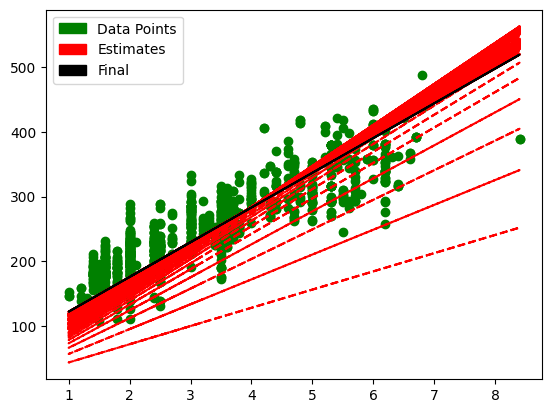

In [25]:
plt.scatter(x_train, y_train, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(x_train,a*x_train+b, color='red', linestyle='dashed')
plt.plot(x_train,a_values[-1]*x_train+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

"""
Los puntos verdes son los puntos de datos, las líneas rojas se crean usando los coeficientes a y b durante el entrenamiento,

y la línea negra es la línea que usamos para modelar la relación 

con los últimos coeficientes.
"""

Este código está generando una gráfica para visualizar el proceso de entrenamiento de un modelo de regresión lineal. Aquí está lo que hace cada parte:

1. `plt.scatter(x_train, y_train, color='green')`: Este comando genera un gráfico de dispersión de los datos de entrenamiento. Los puntos de datos se representan en verde.

2. `for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]): plt.plot(x_train,a*x_train+b, color='red', linestyle='dashed')`: Este bucle traza las estimaciones del modelo en cada paso del entrenamiento. Las líneas de estimación se representan en rojo y con un estilo de línea discontinua.

3. `plt.plot(x_train,a_values[-1]*x_train+b_values[-1], color='black')`: Este comando traza la última estimación del modelo, que se representa en negro.

4. `final = mpatches.Patch(color='Black', label='Final')`, `estimates = mpatches.Patch(color='Red', label='Estimates')`, `data = mpatches.Patch(color='Green', label='Data Points')`: Estos comandos crean etiquetas para la leyenda del gráfico.

5. `plt.legend(handles=[data, estimates, final])`: Este comando agrega una leyenda al gráfico.

6. `plt.show()`: Este comando muestra el gráfico.

En resumen, este código está generando un gráfico que muestra cómo cambian las estimaciones del modelo a lo largo del entrenamiento. Los puntos de datos se muestran en verde, las estimaciones en cada paso se muestran en rojo y la última estimación se muestra en negro.


La gráfica muestra el proceso de entrenamiento de un modelo de regresión lineal. Aquí está lo que podemos analizar:

1. **Puntos de Datos (verdes)**: Los puntos verdes representan los datos de entrenamiento. Estos son los datos que el modelo está intentando aprender a predecir.

2. **Estimaciones del Modelo (líneas rojas discontinuas)**: Las líneas rojas discontinuas representan las estimaciones del modelo en diferentes puntos durante el proceso de entrenamiento. Cada línea punteada muestra la línea de mejor ajuste que el modelo calculó para los datos en una época específica.

3. **Modelo Final (línea roja sólida)**: La línea roja sólida representa la última estimación del modelo después de todas las épocas de entrenamiento. Esta debería ser la línea de mejor ajuste que el modelo ha encontrado para los datos.

En resumen, la gráfica muestra cómo el modelo de regresión lineal está aprendiendo y mejorando sus predicciones a lo largo del tiempo. Los puntos de datos se muestran en verde, las estimaciones en cada paso se muestran en rojo y la última estimación se muestra en negro.
